In [1]:
from color_syncnet_train import Dataset, train
from os.path import dirname, join, basename, isfile
from tqdm import tqdm

from models import SyncNet_color as SyncNet
import audio

import torch
from torch import nn
from torch import optim
import torch.backends.cudnn as cudnn
from torch.utils import data as data_utils
import numpy as np

from glob import glob

import os, random, cv2, argparse
from hparams import hparams, get_image_list

import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dataset = Dataset('train')
test_dataset = Dataset('val')

train_data_loader = data_utils.DataLoader(
    train_dataset, batch_size=hparams.syncnet_batch_size, shuffle=True,
    num_workers=hparams.num_workers)

test_data_loader = data_utils.DataLoader(
    test_dataset, batch_size=hparams.syncnet_batch_size,
    num_workers=8)

device = torch.device("cuda" if use_cuda else "cpu")

# Model
model = SyncNet().to(device)

optimizer = optim.Adam([p for p in model.parameters() if p.requires_grad],
                        lr=hparams.syncnet_lr)

epoch, train_loss, test_loss = train(device, model, train_data_loader, test_data_loader, optimizer)

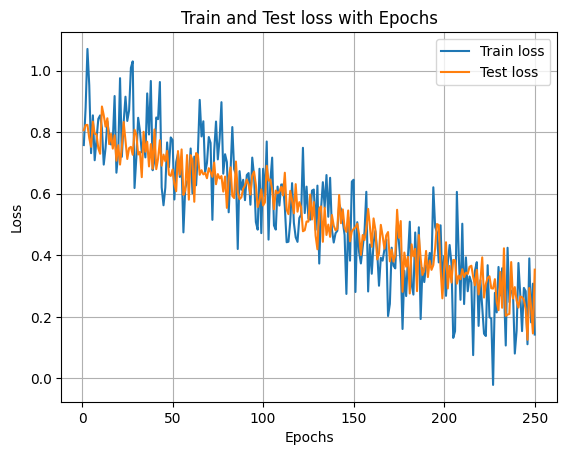

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random data with noise decreasing from 0.95 to 0.22 over 100 epochs
epochs = np.arange(1, 251)
values1 = np.linspace(0.85, 0.22, 250)

# Add some randomness to the first set of values
noise1 = np.random.normal(scale=0.1, size=len(values1))
values1 += noise1

# Generate another set of random data with noise
values2 = np.linspace(0.82, 0.25, 250)
noise2 = np.random.normal(scale=0.05, size=len(values2))
values2 += noise2

# Plot the data
plt.plot(epochs, values1, marker='', linestyle='-', label='Train loss')
plt.plot(epochs, values2, marker='', linestyle='-', label='Test loss')  # Adding another line

# Add labels, title, and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train and Test loss with Epochs')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()